In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [10]:
df_index=pd.read_csv("economic_index.csv")

In [11]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [12]:
# drop the unnecessary columns
df_index.drop(columns=["Unnamed: 0", "year", "month"], axis=1,inplace=True)
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [13]:
## cheak null value
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

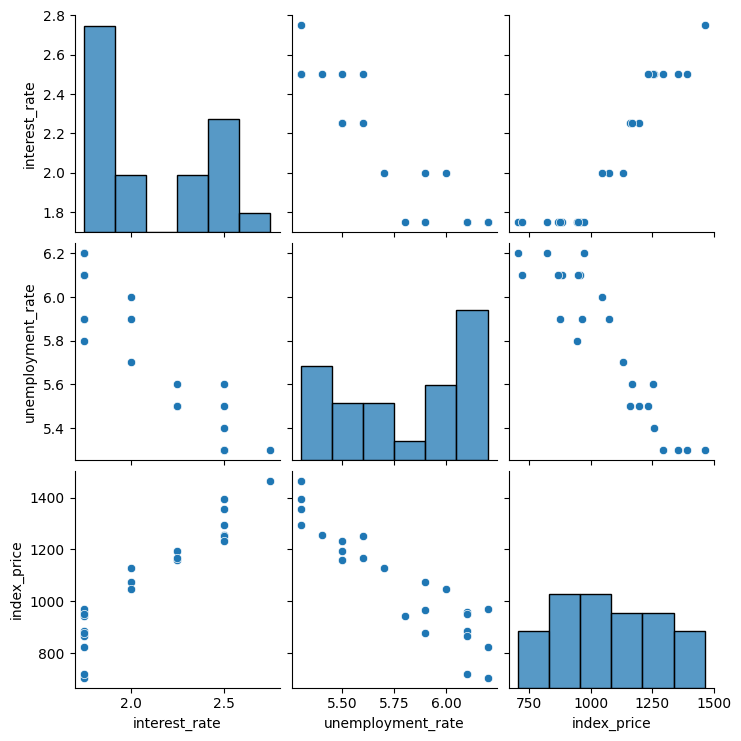

In [14]:
## visualisation
import seaborn as sns
sns.pairplot(df_index)

In [15]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment rate')

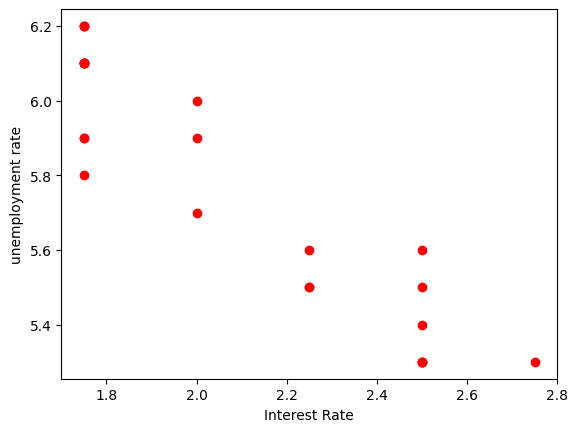

In [16]:
## visualise the datapoint more closely
from turtle import color


plt.scatter(df_index["interest_rate"],df_index["unemployment_rate"],color="red")
plt.xlabel("Interest Rate")
plt.ylabel("unemployment rate")

In [17]:
## get independent and dependent features
X=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]

In [18]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [19]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [21]:
## Train test split
from sklearn.model_selection import train_test_split
import test
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [22]:
X_train

,interest_rate,unemployment_rate
13,1.75,5.9
1,2.50,5.3
21,1.75,6.2
5,2.50,5.6
2,2.50,5.3
12,2.00,6.0
15,1.75,6.1
3,2.50,5.3
4,2.50,5.4
22,1.75,6.2


In [23]:
X_test

,interest_rate,unemployment_rate
8,2.25,5.5
16,1.75,6.2
0,2.75,5.3
18,1.75,6.1
11,2.00,5.9
9,2.25,5.6


In [24]:
y_train

13     965
1     1394
21     822
5     1254
2     1357
12    1047
15     958
3     1293
4     1256
22     704
17     949
20     876
23     719
7     1195
10    1130
14     943
19     866
6     1234
Name: index_price, dtype: int64

In [25]:
y_test

8     1159
16     971
0     1464
18     884
11    1075
9     1167
Name: index_price, dtype: int64

<Axes: xlabel='interest_rate', ylabel='index_price'>

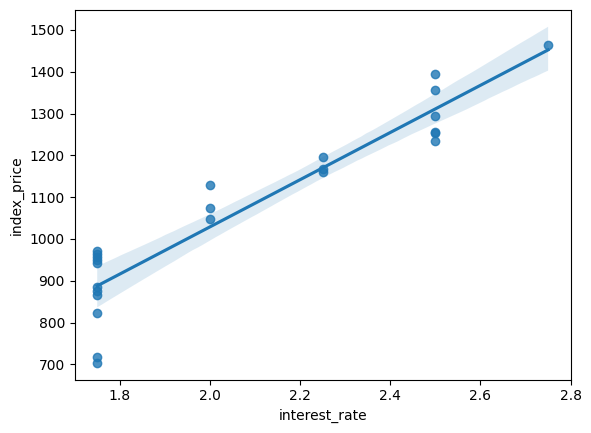

In [28]:
import seaborn as sns

sns.regplot(x=df_index['interest_rate'],y=df_index['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

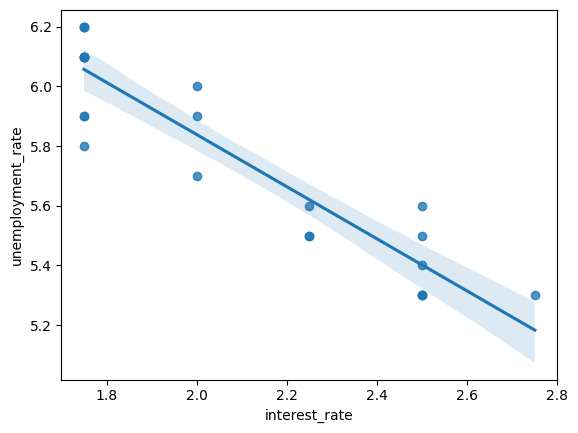

In [29]:
sns.regplot(x=df_index['interest_rate'],y=df_index['unemployment_rate'])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

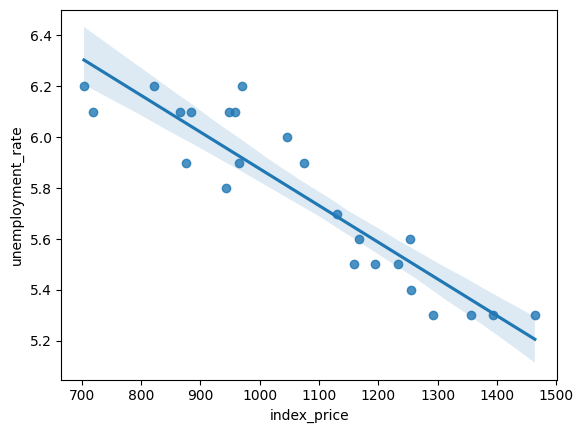

In [31]:
sns.regplot(x=df_index['index_price'],y=df_index['unemployment_rate'])

In [32]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [35]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [36]:
X_test

array([[ 0.36115756, -0.82078268],
       [-1.08347268,  1.33377186],
       [ 1.8057878 , -1.43636969],
       [-1.08347268,  1.02597835],
       [-0.36115756,  0.41039134],
       [ 0.36115756, -0.51298918]])

In [39]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [40]:
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
## Cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [43]:
np.mean(validation_score)

np.float64(-5914.828180162386)

In [44]:
## Prediction
y_pred=regression.predict(X_test)
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [45]:
##Preformence matrixs
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [47]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("mse: ",mse)
print("mae: ",mae)
print("rmse: ",rmse)

mse:  8108.567426306604
mae:  73.80444932337097
rmse:  90.04758423359621


## R Square

Formula

R^2= 1-SSR/SST

R^2 = coefficient of determination SSR = sum of square of residuals SST = total sum of squares

In [48]:
from sklearn.metrics import r2_score

In [49]:
score = r2_score(y_test,y_pred)
print(score)

0.7591371539010257


## Adjusted R^2

Formula 

Adjusted R2 = 1-[(1-R2)*(n-1)/(n-k-1)]

Where:

R2:The R2 of model n: The number of observations k: the number of predicted variables

In [50]:
## displayadusted R-squared
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5985619231683761

## Assumption

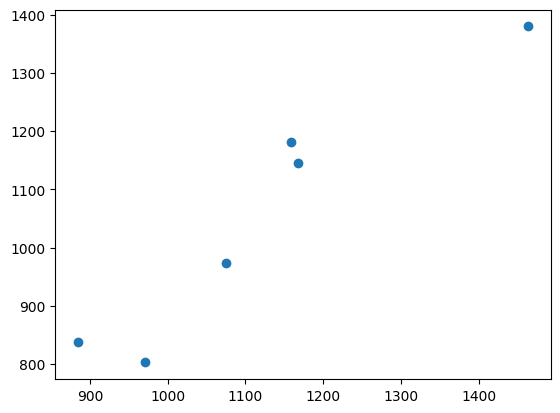

In [51]:
plt.scatter(y_test,y_pred)

In [52]:
residuals=y_test-y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


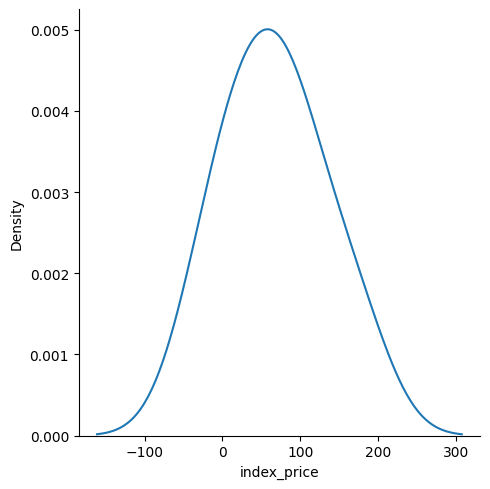

In [54]:
## Plot the residuals
sns.displot(residuals,kind='kde')

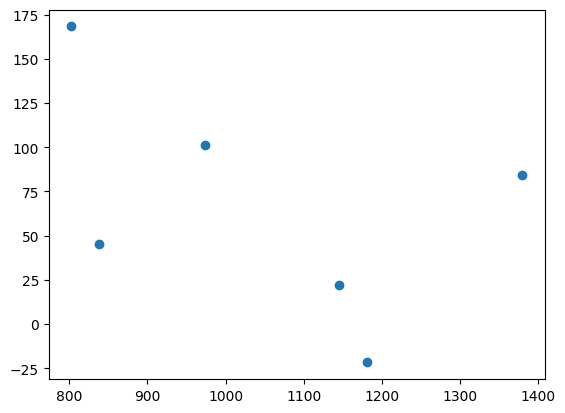

In [55]:
## Scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)

# OLS Linear Regression

In [56]:
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()

In [57]:
prediction = model.predict(X_test)
print(prediction)

[ 127.30223686 -250.70164745  326.390126   -214.91844842  -79.59130481
   91.51903783]


In [59]:
print(regression.coef_)

[  88.27275507 -116.25716066]


In [58]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Tue, 15 Jul 2025   Prob (F-statistic):                       0.754
Time:                        19:45:06   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\Arjun\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [61]:
## Prediction for new data
regression.predict(scaler.transform([[72,56]]))

c:\Users\Arjun\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([899.47917487])